In [8]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn.decomposition import NMF

In [3]:
X = np.loadtxt('cbcl/svm.train.normgrey')

In [4]:
X.shape

(6977, 362)

In [6]:
X = X[:, :-1]

In [7]:
X.shape

(6977, 361)

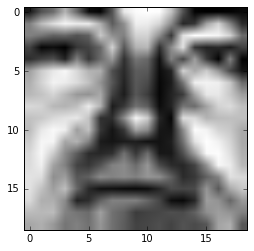

In [10]:
plt.imshow(X[100].reshape((19, 19)), cmap=cm.gray)

In [43]:
nmf = NMF(n_components=100)

In [44]:
nmf.fit(X)

NMF(alpha=0.0, beta=1, eta=0.1, init=None, l1_ratio=0.0, max_iter=200,
  n_components=100, nls_max_iter=2000, random_state=None, shuffle=False,
  solver='cd', sparseness=None, tol=0.0001, verbose=0)

In [45]:
X_transformed_nmf = nmf.fit_transform(X)

In [46]:
X_transformed_nmf.shape

(6977, 100)

In [67]:
loadings = nmf.components_

In [68]:
loadings.shape

(100, 361)

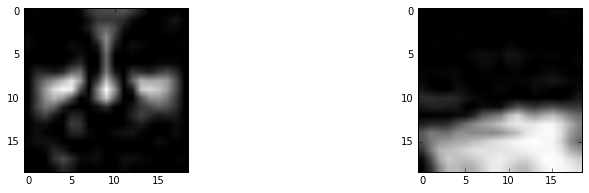

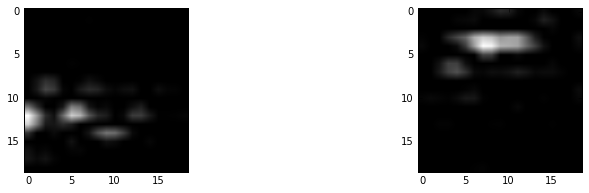

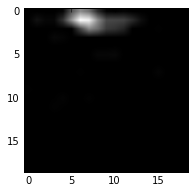

In [69]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(loadings[0].reshape((19, 19)), cmap=cm.gray)

plt.subplot(1, 3, 3)
plt.imshow(loadings[1].reshape((19, 19)), cmap=cm.gray)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(loadings[2].reshape((19, 19)), cmap=cm.gray)

plt.subplot(1, 3, 3)
plt.imshow(loadings[3].reshape((19, 19)), cmap=cm.gray)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(loadings[4].reshape((19, 19)), cmap=cm.gray)

In [50]:
print ('Reconstructions error: ', nmf.reconstruction_err_)

('Reconstructions error: ', 125.10051946420903)


## Reconstructing an image

In [62]:
X_sample_rec_nmf = np.dot(X_transformed_nmf[50], loadings)

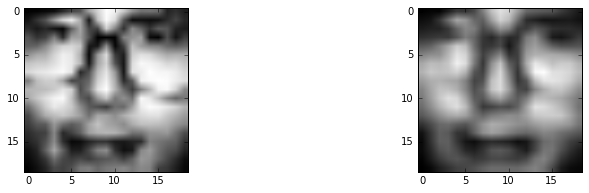

In [63]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(X[50].reshape((19, 19)), cmap=cm.gray)

plt.subplot(1, 3, 3)
plt.imshow(X_sample_rec_nmf.reshape((19, 19)), cmap=cm.gray)

## Comparison with PCA

In [22]:
from sklearn.decomposition import PCA

In [53]:
pca = PCA(n_components=100)

In [54]:
X_transformed_pca = pca.fit_transform(X)

In [55]:
X_transformed_pca.shape

(6977, 100)

In [56]:
principal_components = pca.components_

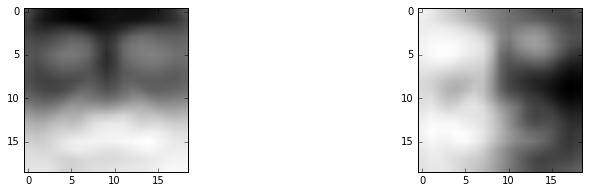

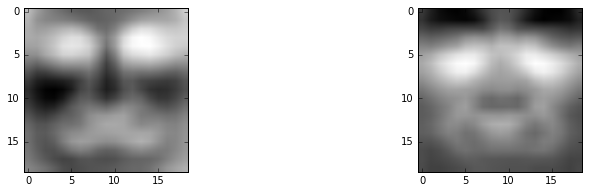

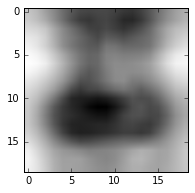

In [57]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(principal_components[0].reshape((19, 19)), cmap=cm.gray)

plt.subplot(1, 3, 3)
plt.imshow(principal_components[1].reshape((19, 19)), cmap=cm.gray)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(principal_components[2].reshape((19, 19)), cmap=cm.gray)

plt.subplot(1, 3, 3)
plt.imshow(principal_components[3].reshape((19, 19)), cmap=cm.gray)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(principal_components[4].reshape((19, 19)), cmap=cm.gray)

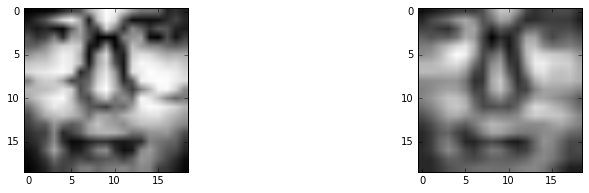

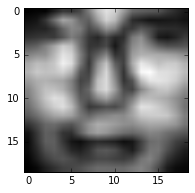

In [66]:
X_sample_rec_pca = np.dot(X_transformed_pca[50], principal_components)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(X[50].reshape((19, 19)), cmap=cm.gray)

plt.subplot(1, 3, 3)
plt.imshow(X_sample_rec_pca.reshape((19, 19)), cmap=cm.gray)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(X_sample_rec_nmf.reshape((19, 19)), cmap=cm.gray)